In [12]:
import requests
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
request_header = {'Content-Type': 'image/webp; charset=UTF-8', 

                  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:126.0) Gecko/20100101 Firefox/126.0',

                'Accept-Encoding': 'gzip, deflate, br, zstd'                  

                 }

In [3]:
url='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off'

In [4]:
Data=requests.get(url)
Data

<Response [200]>

In [5]:
data_content = Data.content 

In [6]:
from bs4 import BeautifulSoup

In [7]:
new_data = BeautifulSoup(data_content)

In [8]:
new_data.text

' Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com    Explore PlusLoginBecome a Seller More CartFiltersCATEGORIESComputersLaptopsProcessorCore i5Core i3Core i7Ryzen 7 Quad CoreRyzen 5 Quad CoreCore i961 MOREBrandPrice.......Min₹20000₹40000₹50000₹60000₹75000to₹20000₹40000₹50000₹60000₹75000₹75000+TypeProcessor GenerationRAM CapacitySSD CapacityScreen SizeOperating SystemWeightTouch ScreenProcessor BrandUsageDedicated Graphics MemoryFeaturesStorage TypeGraphics Memory TypeGraphic Processor NameHard Disk CapacityRam TypeAvailabilityDiscountCustomer Ratings4★ & above3★ & above2★ & above1★ & aboveUsage?GST Invoice AvailableOffersSpecial PriceNo Cost EMIRAM CapacityNeed help?Help me decideHomeComputersLaptopsShowing 1 – 24 of 2,263 results for "laptops"Sort ByRelevancePopularityPrice -- Low to HighPrice -- High to LowNewest FirstAdd to CompareAcer Aspire 3 Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) A324-51 Thin and Light ...4.25,226 Rat

In [9]:
soup=new_data

In [10]:
Title = []
Brand = []
Model = []
RAM = []
SSD = []
Display_Size = []
Warrenty = []
Processor = []
Ratings = []
Reviews_Count = []
Price = []
Exchange_discount = []


for i in range(1,40):
    url = f'https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_3_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptops&requestId=7637cfc9-9e5d-4f20-ba6a-247aba179f1d&page={i}'
    response = requests.get(url,headers=request_header)
    soup = BeautifulSoup(response.text,'html.parser')
    for b in soup.find_all("div",class_="tUxRFH"):    #Container
        text = b.text
        t = b.find('div',class_='KzDlHZ')  #title
        if t:
            Title.append(t.text)
        else:
            Title.append(np.nan)


        regex_b = re.findall(r'Compare(\w+)\s',text)
        if regex_b:
            Brand.append(regex_b[0])
        else:
            Brand.append(np.nan)
    
        r = re.findall(r"\d{1,3}\s*GB(?:\s*(?:DDR\d|LPDDR\dX))?\s*(?:RAM)?",text)   #pattern for RAM
        if r:
            RAM.append(r[0])
        else:
            RAM.append(np.nan)

        ro = re.findall(r'(\d{1,4})\s*(GB|TB)\s*(NVMe|PCIe|SATA)?\s*SSD',text)   #pattern for ROM
        if ro:
            SSD.append(ro[0])
        else:
            SSD.append(np.nan)

        Ds = re.findall(r'\(([-+]?\d*\.?\d+)\s\w+\)',text) # Pattern for Display size
        if Ds:
            Display_Size.append(Ds[0])
        else:
            Display_Size.append(np.nan)

        w = re.findall(r'(\d)\sYear',text)
        if w:
            Warrenty.append(w[0])
        else:
            Warrenty.append('0')
        p = re.findall(r'(Intel|AMD)\s+[A-Za-z0-9\s]+?(Processor(?:\s*\(.*?\))?)',text)
        if p:
            Processor.append(p[0])
        else:
            Processor.append(np.nan)

        r = re.findall(r'\)(\d+\.?\d)',text)
        if r:
            Ratings.append(r[0])
        else:
            Ratings.append(np.nan)

        rev = re.findall(r'&(.+)\sReviews',text)
        if rev:
            Reviews_Count.append(rev[0][1:])
        else:
            Reviews_Count.append(np.nan)

        pr = re.findall(r'₹(\d+,\d+)',text)
        if pr:
            Price.append(pr[0])
        else:
            Price.append(np.nan)
            
        ed = re.findall(r'₹(\d+,\d+)\sOff',text)
        if ed:
            Exchange_discount.append(ed[0])
        else:
            Exchange_discount.append("Not applicable") 


In [11]:

dict1 = {"Title":Title,"Brand":Brand, "RAM": RAM ,"SSD": SSD, "DISPLAY_SIZE" : Display_Size,
         "WARRENTY": Warrenty,"PROCESSOR": Processor,"RATINGS": Ratings ,"REVIEWS_COUNT": Reviews_Count , "PRICE" : Price , 
         "EXCHANGE_DISCOUNT":Exchange_discount}

In [12]:
df=pd.DataFrame(dict1)
df

,Title,Brand,RAM,SSD,DISPLAY_SIZE,WARRENTY,PROCESSOR,RATINGS,REVIEWS_COUNT,PRICE,EXCHANGE_DISCOUNT
0,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Acer,8 GB,"(512, GB, )",14,1,"(Intel, Processor (12th Gen))",NaN,388,"25,990","22,000"
1,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Acer,8 GB,"(512, GB, )",11.6,1,"(Intel, Processor)",NaN,581,"22,899",Not applicable
2,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,Acer,16 GB,"(512, GB, )",15.6,1,"(Intel, Processor (13th Gen))",16,203,"54,990","22,000"
3,Samsung Galaxy Book4 Edge Series Copilot AI-PC...,Samsung,16 GB,"(512, GB, )",15.6,1,NaN,NaN,105,"64,990","22,000"
4,Samsung Galaxy Book5 AI Metal Intel Core Ultra...,Samsung,16 GB,"(512, GB, )",15.6,1,"(Intel, Processor)",NaN,39,"72,140","22,000"
...,...,...,...,...,...,...,...,...,...,...,...
859,HP 14 (2025) Intel Core i3 13th Gen 1315U - (1...,HP,16 GB,"(512, GB, )",14,1,"(Intel, Processor (13th Gen))",16,3,"38,990","22,000"
860,HP 255 G9 AMD Ryzen 3 Dual Core 3250 - (8 GB/5...,HP,8 GB,"(512, GB, )",15.6,1,"(AMD, Processor)",NaN,110,"35,990",Not applicable
861,HP Victus Intel Core i7 13th Gen 13620H - (24 ...,HP,24 GB,"(1, TB, )",15.6,1,"(Intel, Processor (13th Gen))",24,NaN,"1,10",Not applicable
862,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,Lenovo,8 GB,"(256, GB, )",15.6,2,"(Intel, Processor (11th Gen))",NaN,37,"36,990",Not applicable


In [13]:
brand_name=[]
for i in Title:
    ed = re.findall(r'^[^\w]*([A-Z][A-Za-z]+)',i)
    if ed:
        brand_name.append(ed[0])
    else:
        brand_name.append(np.nan)

In [14]:
len(brand_name)

864

In [15]:
model_name=[]
for i in Title:
    ed = re.findall(r'\w+\s(.+)\(',i)
    if ed:
        model_name.append(ed[0])
    else:
        model_name.append(np.nan)

In [16]:
dict1 = {
         "Brand":brand_name,
         "Model":model_name,
         "RAM": RAM ,
         "SSD": SSD, 
         "DISPLAY_SIZE" : Display_Size,
         "WARRENTY": Warrenty,
         "PROCESSOR": Processor,
         "RATINGS": Ratings ,
         "REVIEWS_COUNT": Reviews_Count , 
         "PRICE" : Price , 
         "EXCHANGE_DISCOUNT":Exchange_discount}

In [108]:
df=pd.DataFrame(dict1)
df

,Brand,Model,RAM,SSD,DISPLAY_SIZE,WARRENTY,PROCESSOR,RATINGS,REVIEWS_COUNT,PRICE,EXCHANGE_DISCOUNT
0,Acer,Aspire 3 Intel Core i3 12th Gen 1215U -,8 GB,"(512, GB, )",14,1,"(Intel, Processor (12th Gen))",NaN,388,"25,990","22,000"
1,Acer,Aspire 3 Intel Celeron Dual Core -,8 GB,"(512, GB, )",11.6,1,"(Intel, Processor)",NaN,581,"22,899",Not applicable
2,Acer,Aspire 7 Intel Core i5 13th Gen 13420H -,16 GB,"(512, GB, )",15.6,1,"(Intel, Processor (13th Gen))",16,203,"54,990","22,000"
3,Samsung,Galaxy Book4 Edge Series Copilot AI-PC Full Me...,16 GB,"(512, GB, )",15.6,1,NaN,NaN,105,"64,990","22,000"
4,Samsung,Galaxy Book5 AI Metal Intel Core Ultra 5 225U -,16 GB,"(512, GB, )",15.6,1,"(Intel, Processor)",NaN,39,"72,140","22,000"
...,...,...,...,...,...,...,...,...,...,...,...
859,HP,14 (2025) Intel Core i3 13th Gen 1315U -,16 GB,"(512, GB, )",14,1,"(Intel, Processor (13th Gen))",16,3,"38,990","22,000"
860,HP,255 G9 AMD Ryzen 3 Dual Core 3250 -,8 GB,"(512, GB, )",15.6,1,"(AMD, Processor)",NaN,110,"35,990",Not applicable
861,HP,Victus Intel Core i7 13th Gen 13620H -,24 GB,"(1, TB, )",15.6,1,"(Intel, Processor (13th Gen))",24,NaN,"1,10",Not applicable
862,Lenovo,IdeaPad Slim 3 Intel Core i3 11th Gen -,8 GB,"(256, GB, )",15.6,2,"(Intel, Processor (11th Gen))",NaN,37,"36,990",Not applicable


In [111]:
df["PRICE"] = (
    df["PRICE"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", pd.NA)
    .astype("Int32")
)


In [112]:
df["PRICE"].head()

0    25990
1    22899
2    54990
3    64990
4    72140
Name: PRICE, dtype: Int32

In [48]:
df["RAM"]

0       8 GB
1       8 GB
2      16 GB
3      16 GB
4      16 GB
       ...  
859    16 GB
860     8 GB
861    24 GB
862     8 GB
863     8 GB
Name: RAM, Length: 864, dtype: object

In [116]:
l=[]
for i in df["RAM"].str.replace("GB","").str.strip():
    l.append(i)

In [117]:
df["Ram"] = l

In [118]:
df["Ram"]

0       8
1       8
2      16
3      16
4      16
       ..
859    16
860     8
861    24
862     8
863     8
Name: Ram, Length: 864, dtype: object

In [119]:
df["RAM of Laptops"] = (
    df["Ram"]
    .astype(str)
    .str.extract(r'(\d+)')      # extract RAM numbers
    .astype(float)              # convert extracted values
    .astype("int32")            # final integer dtype
)


In [120]:
df["RAM of Laptops"].head()
df["RAM of Laptops"].dtype

dtype('int32')

In [121]:
df["SSD"] = (
    df["SSD"]
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
    
)


In [122]:
df["SSD"].head()

0    512.0
1    512.0
2    512.0
3    512.0
4    512.0
Name: SSD, dtype: float64

In [73]:
df["SSD"].dtype

dtype('float64')

In [123]:
df["WARRENTY"] = (
    df["WARRENTY"]
    .astype(str)
    .str.extract(r'(\d+)')      # extract RAM numbers
    .astype(float)              # convert extracted values
    .astype("int32")            # final integer dtype
)

In [124]:
df["DISPLAY_SIZE"] = (
    df["DISPLAY_SIZE"]
    .astype(str)
    .str.extract(r'(\d+)')      
    .astype(float)              
           
)
df["DISPLAY_SIZE"].head()

0    14.0
1    11.0
2    15.0
3    15.0
4    15.0
Name: DISPLAY_SIZE, dtype: float64

In [125]:
df["REVIEWS_COUNT"] = (
    df["REVIEWS_COUNT"]
    .astype(str)
    .str.extract(r'(\d+)')      
    .astype(float)              
           
)

In [126]:
df["REVIEWS_COUNT"].head()

0    388.0
1    581.0
2    203.0
3    105.0
4     39.0
Name: REVIEWS_COUNT, dtype: float64

In [127]:
df.head()

,Brand,Model,RAM,SSD,DISPLAY_SIZE,WARRENTY,PROCESSOR,RATINGS,REVIEWS_COUNT,PRICE,EXCHANGE_DISCOUNT,Ram,RAM of Laptops
0,Acer,Aspire 3 Intel Core i3 12th Gen 1215U -,8 GB,512.0,14.0,1,"(Intel, Processor (12th Gen))",NaN,388.0,25990,"22,000",8,8
1,Acer,Aspire 3 Intel Celeron Dual Core -,8 GB,512.0,11.0,1,"(Intel, Processor)",NaN,581.0,22899,Not applicable,8,8
2,Acer,Aspire 7 Intel Core i5 13th Gen 13420H -,16 GB,512.0,15.0,1,"(Intel, Processor (13th Gen))",16,203.0,54990,"22,000",16,16
3,Samsung,Galaxy Book4 Edge Series Copilot AI-PC Full Me...,16 GB,512.0,15.0,1,NaN,NaN,105.0,64990,"22,000",16,16
4,Samsung,Galaxy Book5 AI Metal Intel Core Ultra 5 225U -,16 GB,512.0,15.0,1,"(Intel, Processor)",NaN,39.0,72140,"22,000",16,16


In [128]:
df.dtypes

Brand                 object
Model                 object
RAM                   object
SSD                  float64
DISPLAY_SIZE         float64
WARRENTY               int32
PROCESSOR             object
RATINGS               object
REVIEWS_COUNT        float64
PRICE                  Int32
EXCHANGE_DISCOUNT     object
Ram                   object
RAM of Laptops         int32
dtype: object

In [129]:
df.drop(columns=["RAM","RATINGS","Ram"],inplace=True)

In [132]:
df["EXCHANGE_DISCOUNT"] = (
    df["EXCHANGE_DISCOUNT"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", pd.NA)
    .astype("Int32")
)


In [133]:
df["EXCHANGE_DISCOUNT"].head()

0    22000
1     <NA>
2    22000
3    22000
4    22000
Name: EXCHANGE_DISCOUNT, dtype: Int32

In [134]:
df.head()

,Brand,Model,SSD,DISPLAY_SIZE,WARRENTY,PROCESSOR,REVIEWS_COUNT,PRICE,EXCHANGE_DISCOUNT,RAM of Laptops
0,Acer,Aspire 3 Intel Core i3 12th Gen 1215U -,512.0,14.0,1,"(Intel, Processor (12th Gen))",388.0,25990,22000,8
1,Acer,Aspire 3 Intel Celeron Dual Core -,512.0,11.0,1,"(Intel, Processor)",581.0,22899,<NA>,8
2,Acer,Aspire 7 Intel Core i5 13th Gen 13420H -,512.0,15.0,1,"(Intel, Processor (13th Gen))",203.0,54990,22000,16
3,Samsung,Galaxy Book4 Edge Series Copilot AI-PC Full Me...,512.0,15.0,1,NaN,105.0,64990,22000,16
4,Samsung,Galaxy Book5 AI Metal Intel Core Ultra 5 225U -,512.0,15.0,1,"(Intel, Processor)",39.0,72140,22000,16


In [135]:
df.to_csv("laptops.csv")

In [6]:
df1 = pd.read_csv(r"C:\Users\pavan\Regex\laptops.csv")

In [4]:
df1.head()

,Unnamed: 0,Brand,Model,SSD,DISPLAY_SIZE,WARRENTY,PROCESSOR,REVIEWS_COUNT,PRICE,EXCHANGE_DISCOUNT,RAM of Laptops
0,0,Acer,Aspire 3 Intel Core i3 12th Gen 1215U -,512.0,14.0,1,"('Intel', 'Processor (12th Gen)')",388.0,25990,22000.0,8
1,1,Acer,Aspire 3 Intel Celeron Dual Core -,512.0,11.0,1,"('Intel', 'Processor')",581.0,22899,NaN,8
2,2,Acer,Aspire 7 Intel Core i5 13th Gen 13420H -,512.0,15.0,1,"('Intel', 'Processor (13th Gen)')",203.0,54990,22000.0,16
3,3,Samsung,Galaxy Book4 Edge Series Copilot AI-PC Full Me...,512.0,15.0,1,NaN,105.0,64990,22000.0,16
4,4,Samsung,Galaxy Book5 AI Metal Intel Core Ultra 5 225U -,512.0,15.0,1,"('Intel', 'Processor')",39.0,72140,22000.0,16


In [5]:
df1.shape

(864, 11)

In [6]:
df1.dtypes

Unnamed: 0             int64
Brand                 object
Model                 object
SSD                  float64
DISPLAY_SIZE         float64
WARRENTY               int64
PROCESSOR             object
REVIEWS_COUNT        float64
PRICE                  int64
EXCHANGE_DISCOUNT    float64
RAM of Laptops         int64
dtype: object

In [7]:
df1.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              864 non-null    object 
 1   Model              861 non-null    object 
 2   SSD                831 non-null    float64
 3   DISPLAY_SIZE       863 non-null    float64
 4   WARRENTY           864 non-null    int64  
 5   PROCESSOR          817 non-null    object 
 6   REVIEWS_COUNT      815 non-null    float64
 7   PRICE              864 non-null    int64  
 8   EXCHANGE_DISCOUNT  424 non-null    float64
 9   RAM of Laptops     864 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 67.6+ KB


In [9]:
df1.duplicated().sum()

95

In [10]:
df1.isnull().sum()

Brand                  0
Model                  3
SSD                   33
DISPLAY_SIZE           1
WARRENTY               0
PROCESSOR             47
REVIEWS_COUNT         49
PRICE                  0
EXCHANGE_DISCOUNT    440
RAM of Laptops         0
dtype: int64

In [12]:
df1=df1.fillna({"Model":"Unknown",
               "SSD":df1["SSD"].mode()[0],
               "DISPLAY_SIZE":df1["DISPLAY_SIZE"].mean(),
               "PROCESSOR":"Unknown",
               "REVIEWS_COUNT":"0",
                "EXCHANGE_DISCOUNT":"0"})

In [14]:
df1.isnull().sum()

Brand                0
Model                0
SSD                  0
DISPLAY_SIZE         0
WARRENTY             0
PROCESSOR            0
REVIEWS_COUNT        0
PRICE                0
EXCHANGE_DISCOUNT    0
RAM of Laptops       0
dtype: int64

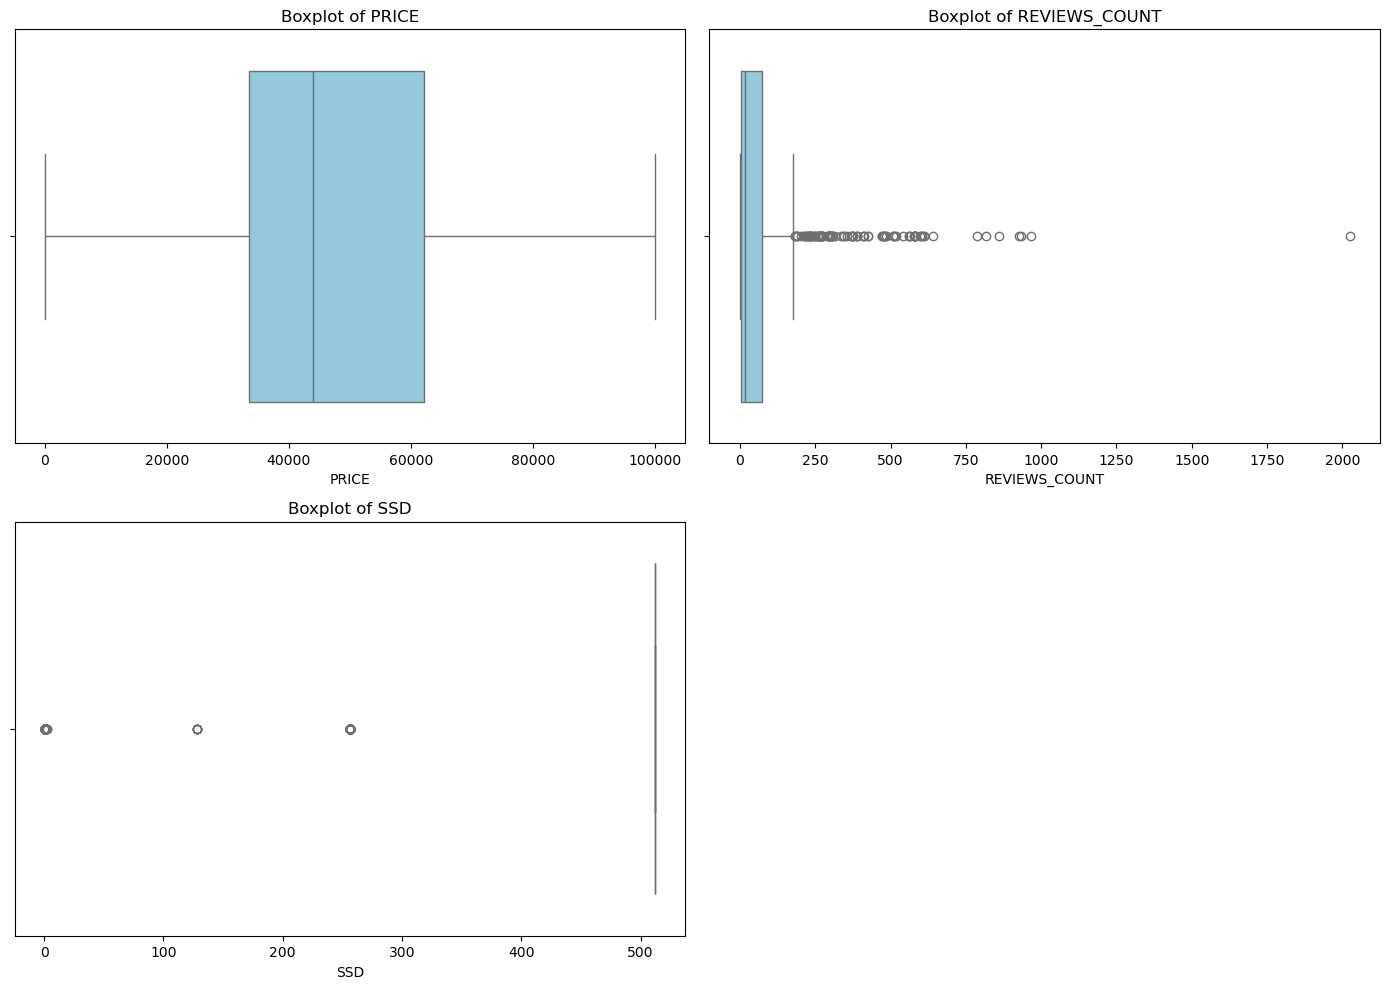

In [18]:
plt.figure(figsize=(14, 10))

columns = ["PRICE", "REVIEWS_COUNT", "SSD"]

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df1[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [19]:
df1.to_csv("laptops_cleaned_data",index=False)

In [13]:
df_lap=pd.read_csv("laptops_cleaned_data")

In [16]:
df_lap

,Unnamed: 0.1,Unnamed: 0,Brand,Model,SSD,DISPLAY_SIZE,WARRENTY,PROCESSOR,REVIEWS_COUNT,PRICE,EXCHANGE_DISCOUNT,RAM of Laptops
0,0,0,Acer,Aspire 3 Intel Core i3 12th Gen 1215U -,512.0,14.0,1,"('Intel', 'Processor (12th Gen)')",388.0,25990,22000.0,8
1,1,1,Acer,Aspire 3 Intel Celeron Dual Core -,512.0,11.0,1,"('Intel', 'Processor')",581.0,22899,NaN,8
2,2,2,Acer,Aspire 7 Intel Core i5 13th Gen 13420H -,512.0,15.0,1,"('Intel', 'Processor (13th Gen)')",203.0,54990,22000.0,16
3,3,3,Samsung,Galaxy Book4 Edge Series Copilot AI-PC Full Me...,512.0,15.0,1,NaN,105.0,64990,22000.0,16
4,4,4,Samsung,Galaxy Book5 AI Metal Intel Core Ultra 5 225U -,512.0,15.0,1,"('Intel', 'Processor')",39.0,72140,22000.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
859,859,859,HP,14 (2025) Intel Core i3 13th Gen 1315U -,512.0,14.0,1,"('Intel', 'Processor (13th Gen)')",3.0,38990,22000.0,16
860,860,860,HP,255 G9 AMD Ryzen 3 Dual Core 3250 -,512.0,15.0,1,"('AMD', 'Processor')",110.0,35990,NaN,8
861,861,861,HP,Victus Intel Core i7 13th Gen 13620H -,1.0,15.0,1,"('Intel', 'Processor (13th Gen)')",NaN,110,NaN,24
862,862,862,Lenovo,IdeaPad Slim 3 Intel Core i3 11th Gen -,256.0,15.0,2,"('Intel', 'Processor (11th Gen)')",37.0,36990,NaN,8


In [25]:
df_lap["WARRENTY"].value_counts()

WARRENTY
1    744
0     88
2     25
3      7
Name: count, dtype: int64

In [24]:
df_lap.dtypes

Brand                 object
Model                 object
SSD                  float64
DISPLAY_SIZE         float64
WARRENTY               int64
PROCESSOR             object
REVIEWS_COUNT        float64
PRICE                  int64
EXCHANGE_DISCOUNT    float64
RAM of Laptops         int64
dtype: object

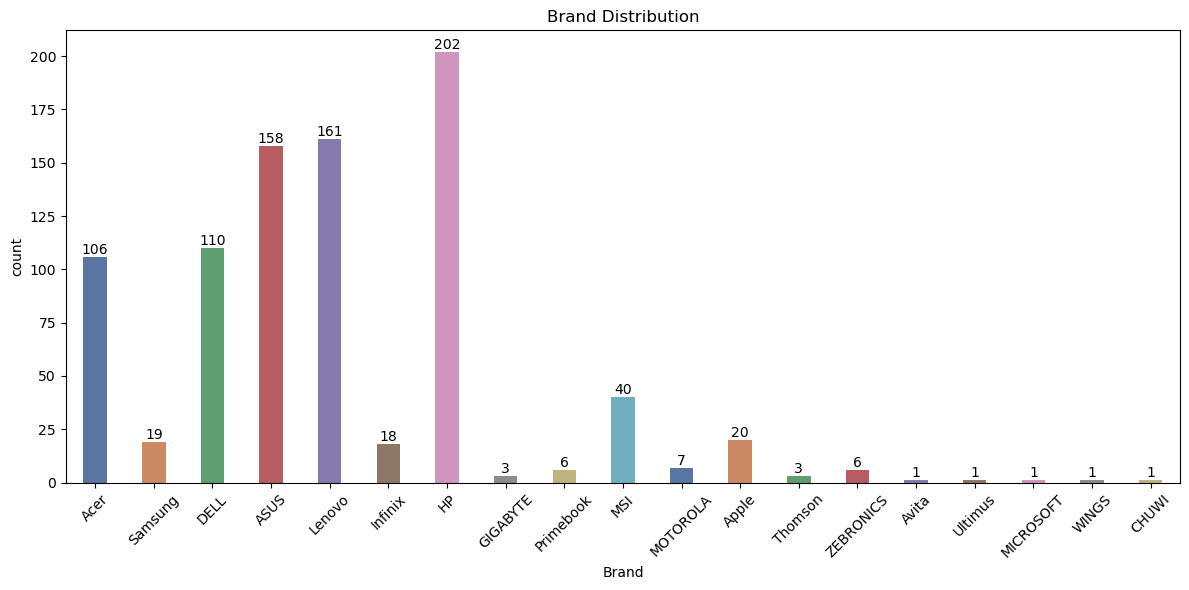

In [21]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = df_lap["Brand"], width = 0.4,palette = "deep")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Brand Distribution",fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

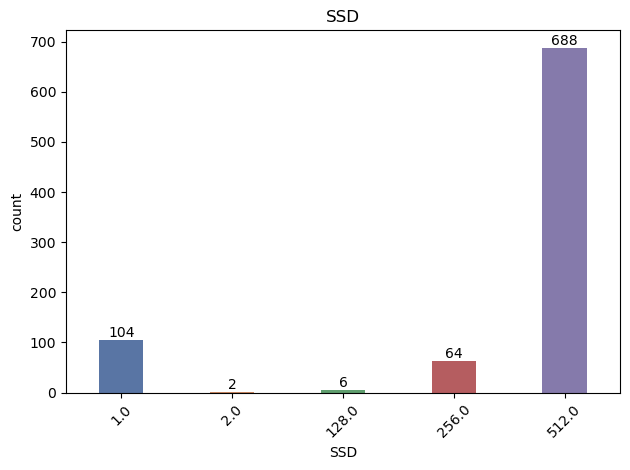

In [3]:
ax = sns.countplot(x = df_lap["SSD"], width = 0.4,palette = "deep")
for container in ax.containers:
    ax.bar_label(container)
plt.title("SSD",fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

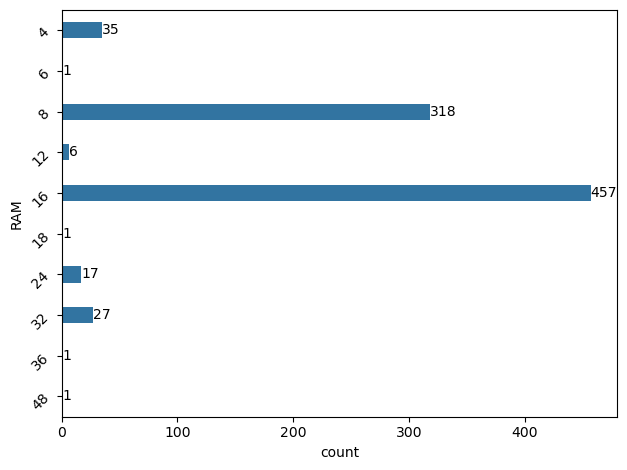

In [5]:
ax = sns.countplot(y = df_lap["RAM of Laptops"], width = 0.4)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("RAM")
plt.yticks(rotation = 45)
plt.tight_layout()
plt.show()

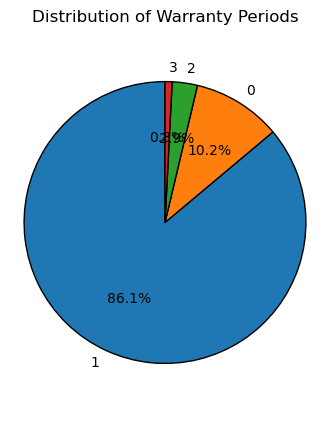

In [8]:
# Count the frequency of each warranty value
warranty_counts = df_lap["WARRENTY"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 5))
plt.pie(
    warranty_counts,
    labels=warranty_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribution of Warranty Periods")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

In [23]:
np.sqrt(len(df_lap))

29.393876913398138

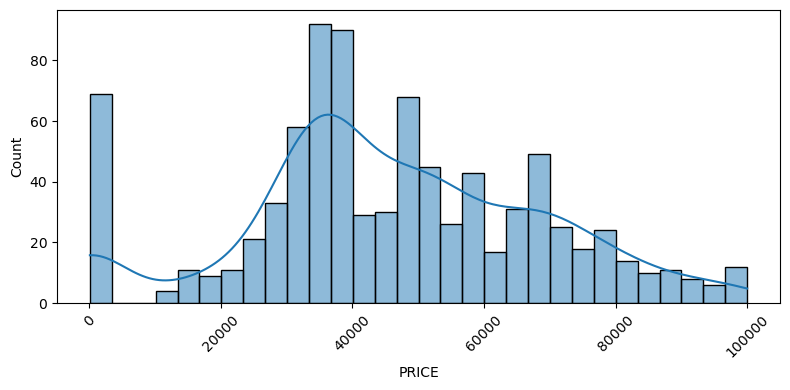

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df_lap["PRICE"],bins = 30,kde = True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Bi-Variante

<Axes: xlabel='DISPLAY_SIZE', ylabel='PRICE'>

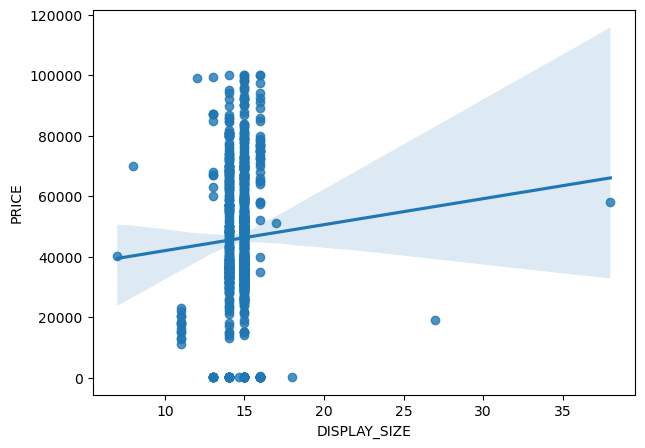

In [30]:
plt.figure(figsize=(7,5))
sns.regplot(data = df_lap, 
            x = "DISPLAY_SIZE", 
            y = "PRICE")

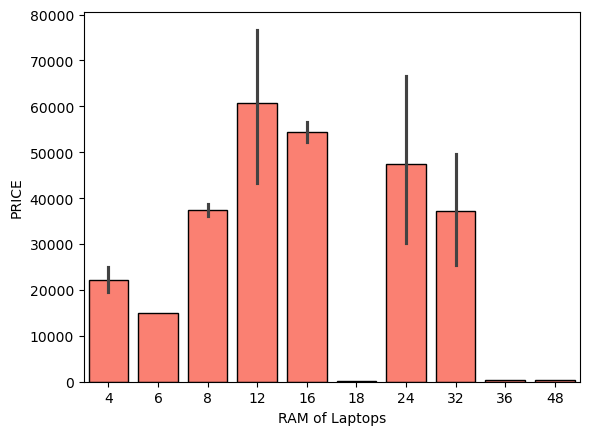

In [17]:
sns.barplot(data=df_lap,x="RAM of Laptops", y="PRICE", 
            facecolor="salmon", edgecolor="black", estimator="mean")
plt.show()

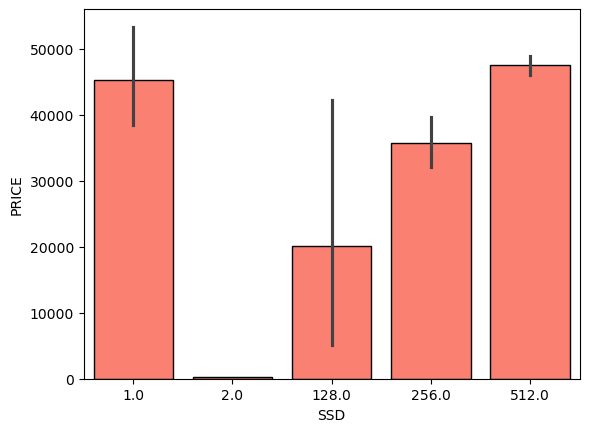

In [18]:
sns.barplot(data=df_lap,x="SSD", y="PRICE", 
            facecolor="salmon", edgecolor="black", estimator="mean")
plt.show()

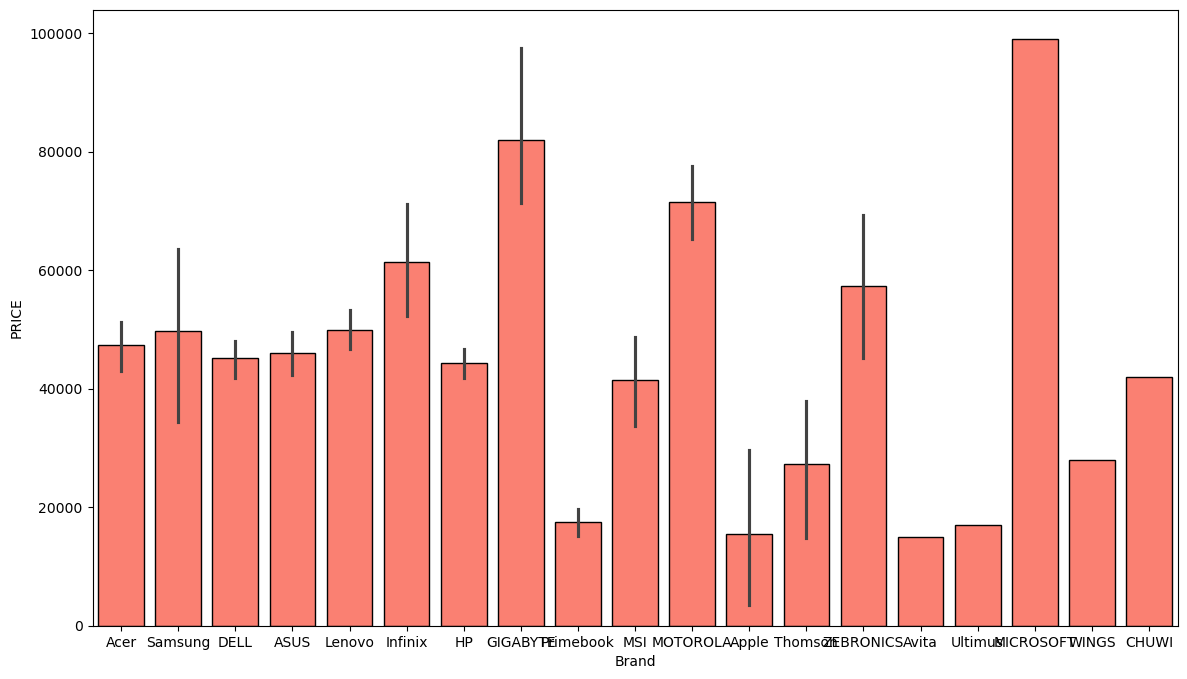

In [33]:
plt.figure(figsize = (14,8))
sns.barplot(data=df_lap,x="Brand", y="PRICE", 
            facecolor="salmon", edgecolor="black", estimator="mean")
plt.show()

### Multivariant

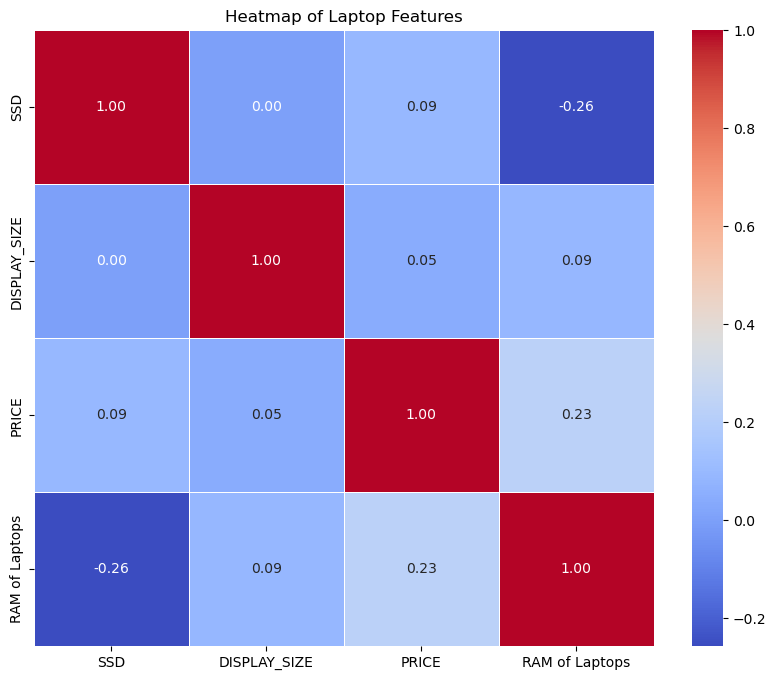

In [11]:


# Select only numerical columns
numeric_cols = ["SSD", "DISPLAY_SIZE",  "PRICE",  "RAM of Laptops"]

# Compute the correlation matrix
corr_matrix = df_lap[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Laptop Features")
plt.show()
